In [1]:
library(Seurat)
library(data.table)
library(ggplot2)
library(flexclust)
library(RColorBrewer)

Loading required package: grid

Loading required package: lattice

Loading required package: modeltools

Loading required package: stats4



# processing

In [3]:
datasetName="/stor/public/hcad/heart_heart_asp2019cellpress/heart_heart_asp2019cellpress"

In [9]:
# scRNA
raw_data <- read.csv("/home/chenyx/HHCA_d/ASP/exprMat_SC_raw.tsv",header = TRUE, sep='\t',row.names = 1)

In [4]:
# Load the metadata and annotation
data.metadata <- read.table(file = paste0(datasetName,"_metadata.tsv"), h = T, sep = "\t", row.names = 5)
data.annotation <- read.table(file = paste0(datasetName,"_annotation.tsv"), h = T, sep = "\t", row.names = 1)

In [10]:
# exlcude some gene
exclude_gene <- read.csv("/home/chenyx/HHCA_d/ASP/tableS1_c.tsv",header = FALSE)
raw_data <- raw_data[!rownames(raw_data)%in% exclude_gene[,1],]

In [12]:
# build object
dataobj <- CreateSeuratObject(counts = raw_data, project = "HHCA-d",min.cells = 15, min.features = 500,meta.data = data.metadata)
dataobj <- AddMetaData(dataobj, metadata = data.annotation)

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”

In [15]:
dataobj <- NormalizeData(dataobj, normalization.method = "LogNormalize", scale.factor = 10000)
dataobj <- FindVariableFeatures(dataobj) # default feature number, nfeatures = 2000
dataobj <- ScaleData(dataobj, features = VariableFeatures(dataobj))

Centering and scaling data matrix


In [16]:
dataobj <- RunPCA(dataobj, features = VariableFeatures(object = dataobj))

PC_ 1 
Positive:  TMSB4X, IFITM3, RAMP2, TIMP1, COL3A1, FCGRT, SPARC, SH3BGRL3, ENG, FXYD5 
	   TFPI, TMSB10, FN1, EGFL7, HLA-E, IGFBP4, CTHRC1, TAGLN2, PLAC9, ANXA1 
	   ANXA2, ECSCR.1, ARHGDIB, TM4SF1, IFI16, C4orf48, PRCP, CDH11, CLIC1, B2M 
Negative:  TNNT2, MYL7, TNNI1, TNNC1, ACTC1, NEBL, MYL4, CSRP3, HSPB7, SMPX 
	   LDB3, TTN, TPM1, ACTN2, FABP3, SLC8A1, SORBS2, MYBPC3, TNNI3, SH3BGR 
	   MYL3, CTD-2545M3.8, PGAM2, MYOM1, POPDC2, PLN, HSPB3, SLC25A4, ENO3, FITM1 
PC_ 2 
Positive:  COL1A1, PTN, COL1A2, FBLN1, SPARC, MFAP4, DCN, PCOLCE, COL9A3, SERPINE2 
	   COL6A3, TCF21, LRRC17, GPC3, PLAC9, COL3A1, LGALS1, PDLIM3, ISLR, MEG3 
	   TAGLN, CTGF, CSRP2, SPON2, CYR61, H19, IGFBP7, SPARCL1, TUBA1A, PCDH18 
Negative:  C1QC, TYROBP, C1QB, C1QA, CSF1R, CD53, GPR34, CYBB, LAPTM5, MS4A7 
	   VSIG4, LST1, HPGDS, FOLR2, LY86, CCL3, FCGR1A, ITGB2, SPI1, FCER1G 
	   RNASE6, ADAP2, MS4A6A, IGSF6, HCST, C3AR1, CTSS, CD14, CD74, PLD4 
PC_ 3 
Positive:  ECSCR.1, ESAM, EMCN, PLVAP, PECAM1, HSPG2,

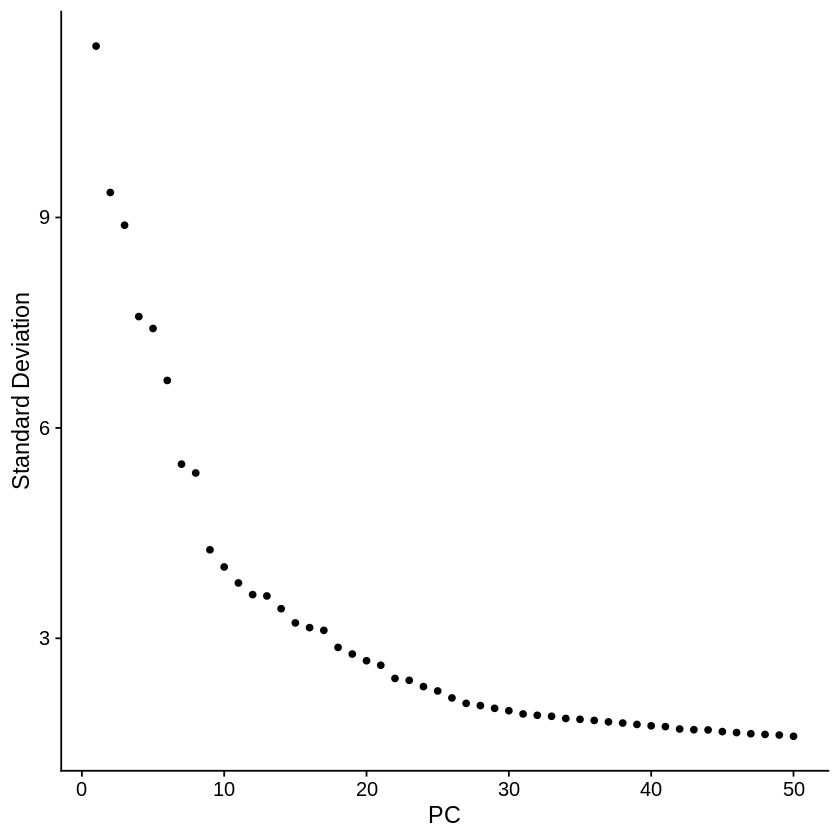

In [18]:
ElbowPlot(dataobj,50) 

In [54]:
pcDim = 40

In [20]:
dataobj <- RunUMAP(dataobj, dims = 1:pcDim)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”17:57:59 UMAP embedding parameters a = 0.9922 b = 1.112
17:57:59 Read 3872 rows and found 40 numeric columns
17:57:59 Using Annoy for neighbor search, n_neighbors = 30
17:57:59 Building Annoy index with metric = cosine, n_trees = 50
0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|----|
**************************************************|
17:58:00 Writing NN index file to temp file /tmp/Rtmpb3F9H2/file3db02fb7e97e
17:58:00 Searching Annoy index using 1 thread, search_k = 3000
17:58:01 Annoy recall = 100%
17:58:02 Commencing smooth kNN distance calibration using 1 thread
17:58:02 Initializing from normalized Laplacian + noise
17:58:02 Commencing optimizatio

ERROR: Error in `[[.Seurat`(object, group.by): Cannot find 'cell_cluster' in this Seurat object


In [28]:
p_umap2 <- DimPlot(dataobj, reduction = "umap", label = TRUE, group.by = "cluster", pt.size=1)
ggsave(paste0(datasetName,".seurat.umap_orig.tiff"), plot = p_umap2, width = 8, height = 5)

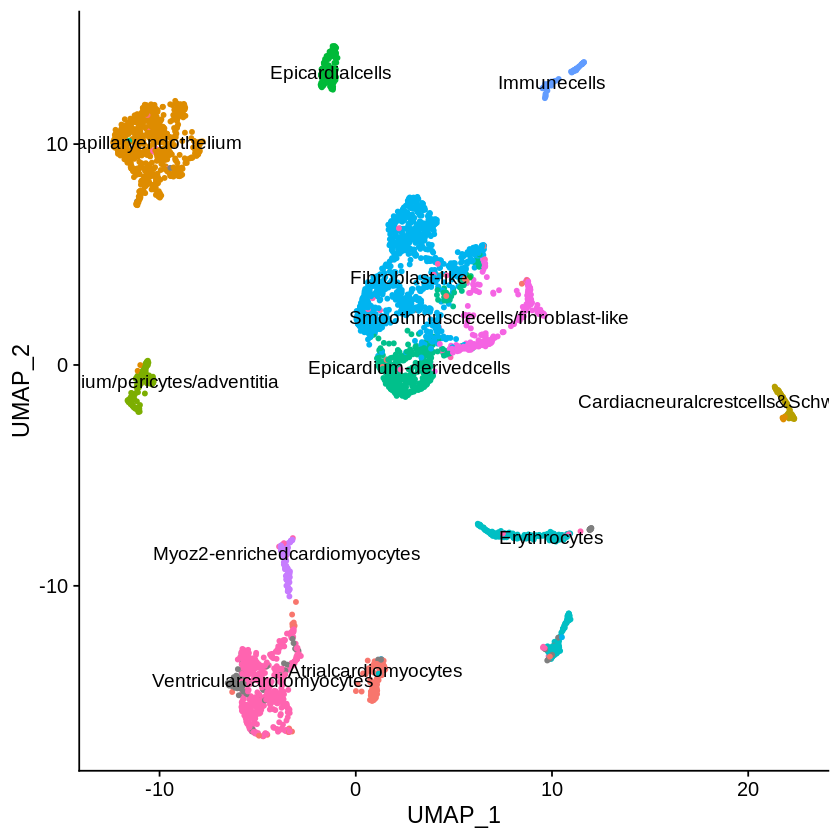

In [26]:
p_umap2

In [5]:
# Cluster the cells
dataobj <- FindNeighbors(dataobj, reduction = "pca", dims = 1:40, nn.eps = 0.5)

Computing nearest neighbor graph
Computing SNN


In [6]:
dataobj <- FindClusters(dataobj, resolution = 0.2, n.start = 10)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3777
Number of edges: 125787

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9599
Number of communities: 15
Elapsed time: 0 seconds


In [7]:
p_umap <- DimPlot(dataobj, reduction = "umap", group.by = 'seurat_clusters', label = TRUE, pt.size=1)
ggsave(paste0(datasetName,".seurat.umap.tiff"), plot = p_umap, width = 8, height = 5)

Warning message:
“Using `as.character()` on a quosure is deprecated as of rlang 0.3.0.
Please use `as_label()` or `as_name()` instead.
This warning is displayed once per session.”

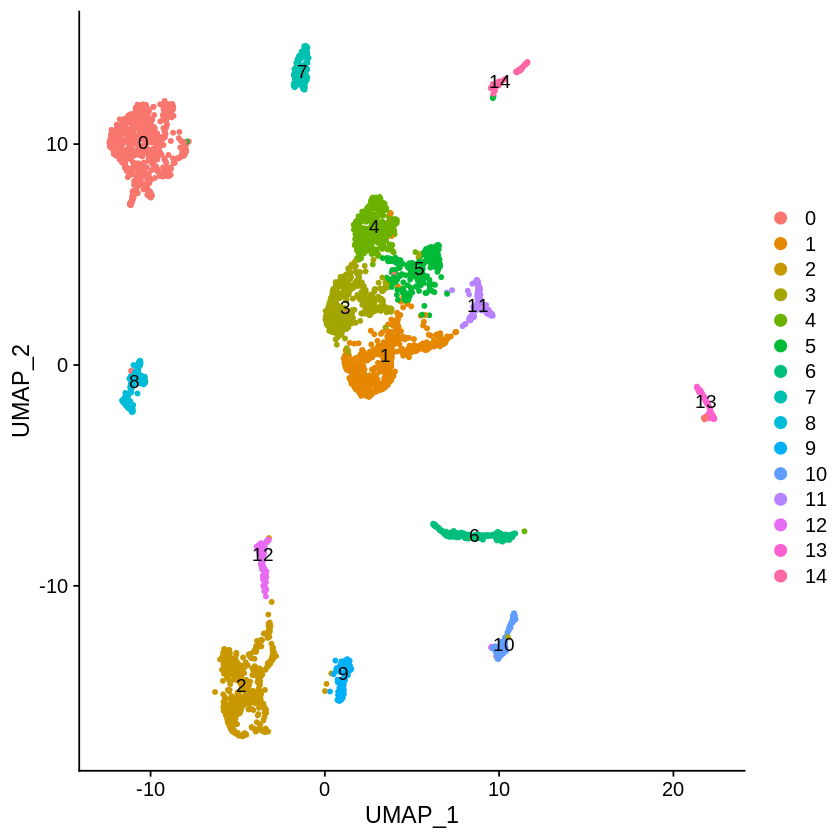

In [8]:
p_umap

In [43]:
# Finding cluster markers 
dataobj.markers <- FindAllMarkers(dataobj, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)
write.table(dataobj.markers, file = paste0(datasetName,".seurat.markers.txt"), sep = "\t", quote = F, row.names = F, col.names = T)

saveRDS(dataobj, file = paste0(datasetName,".seuratobj.rds"))


Calculating cluster 0
Calculating cluster 1
Calculating cluster 2
Calculating cluster 3
Calculating cluster 4
Calculating cluster 5
Calculating cluster 6
Calculating cluster 7
Calculating cluster 8
Calculating cluster 9
Calculating cluster 10
Calculating cluster 11
Calculating cluster 12
Calculating cluster 13
Calculating cluster 14


# annotation

In [3]:
dataobj <- readRDS(paste0(datasetName,".seuratobj.rds"))
# Load marker file
dataobj.markers <- read.table(file = paste0(datasetName,".seurat.markers.txt"), h = T, sep = "\t")

In [45]:
dataobj.markers[dataobj.markers['cluster']==13,]

,p_val,avg_logFC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<fct>
5752,0,3.477996,0.974,0.025,0,13,C1QA
5753,0,3.402494,0.974,0.018,0,13,C1QC
5754,0,3.321438,0.974,0.020,0,13,C1QB
5755,0,3.181984,0.987,0.023,0,13,TYROBP
5756,0,2.894329,0.947,0.019,0,13,CCL3
5757,0,2.813555,0.763,0.012,0,13,HLA-DRA
5758,0,2.390035,0.895,0.008,0,13,FOLR2
5759,0,2.224737,0.895,0.006,0,13,VSIG4
5760,0,2.154776,0.855,0.007,0,13,MS4A6A


In [44]:
dataobj.markers[dataobj.markers['gene']=='SERPINB1',]

,p_val,avg_logFC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<fct>
341,1.666868e-57,0.3235793,0.438,0.166,3.055036e-53,0,SERPINB1
6209,5.809944e-17,0.5383380,0.553,0.209,1.064847e-12,13,SERPINB1


In [9]:
new.cluster.ids <- c('Heart-Epithelial Tissue-Vascular endothelial cell-EMCN',#0
                     'Heart-Musle Tissue-Cardiomyocyte Cell-MYL7',
                     'Heart-Connective Tissue-Fibrocyte-DCN LUM',
                     'Heart-Connective Tissue-Fibrocyte-DCN LUM',
                     'Heart-Connective Tissue-Fibrocyte-COL9A2',#4?
                     'Heart-Connective Tissue-Fibrocyte-DCN LUM',#5
                     'Heart-Connective Tissue-Erythrocyte-MT1H MT1F',
                     'Heart-Epithelial Tissue-Endothelial cell-CXCL14',
                     'Heart-Epithelial Tissue-Pericyte-TM4SF18',
                     'Heart-Musle Tissue-Cardiomyocyte Cell-MYL7',
                     'Heart-Connective Tissue-Erythrocyte-GYPB',#10
                     'Heart-Musle Tissue-Smooth muscle cell-ACTA2',
                     'Heart-Musle Tissue-Cardiomyocyte Cell-MYL7',
                     'Heart-Connective Tissue-Monocyte-C1QA',
                     'Heart-Nerve Tissue-Neuron-LINC00682'
                     )


In [10]:
names(new.cluster.ids) <- levels(dataobj)
dataobj <- RenameIdents(dataobj, new.cluster.ids)
plot <- DimPlot(dataobj, reduction = "umap",label = TRUE, pt.size = 0.1) + NoLegend()

In [28]:
saveRDS(dataobj, file = paste0(datasetName,".seuratobj.rds"))

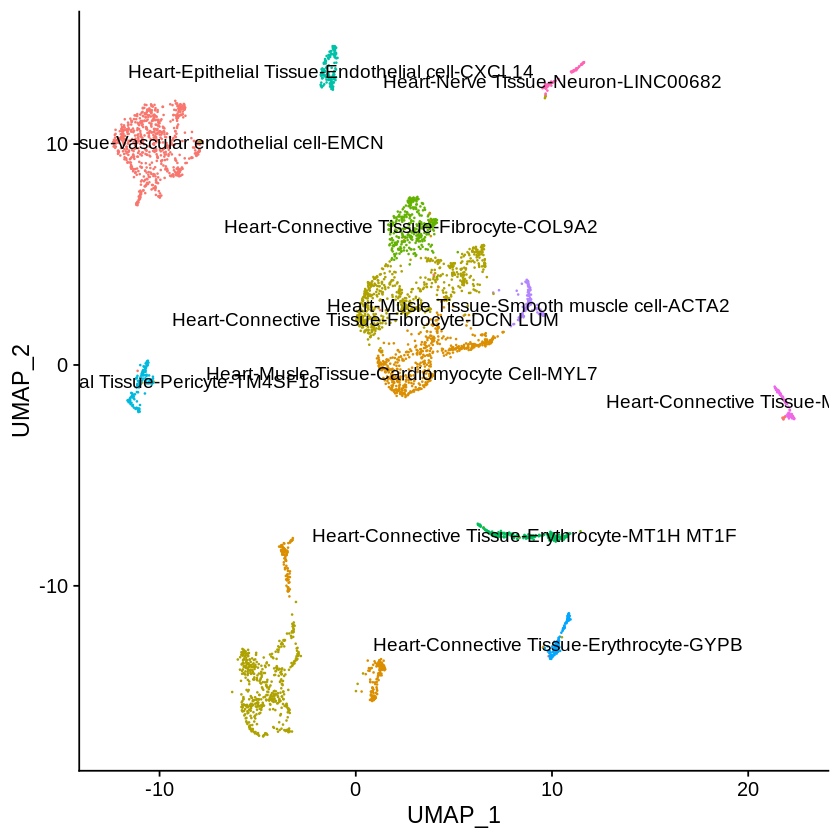

In [11]:
plot

In [12]:
ggsave(paste0(datasetName,".seurat.umap_hcad.tiff"), plot = plot, width = 8, height = 5)

In [13]:
df_hca <- data.frame(rownames(dataobj@meta.data),Idents(dataobj))
colnames(df_hca) <- c('cell_ID', 'cell_cluster')

In [16]:
write.table(df_hca, file = paste0(datasetName,"_annotation.hcad.tsv"), sep = "\t", quote = F, row.names = F, col.names = T)

# Update annotaion

In [10]:
dataobj <- readRDS("/stor/public/hcad/db_v1/heart_heart_asp2019cellpress/heart_heart_asp2019cellpress.seuratobj.dbupload_v1.rds")

In [24]:
table(dataobj$original_name[dataobj$hcad_name == "Heart-Connective tissue-Fibrocyte-COL9A2"])


             Erythrocytes Ventricularcardiomyocytes 
                      188                         5 

In [17]:
dataobj$cell_type[dataobj$hcad_name=="Heart-Epithelial tissue-Endothelial cell-CXCL14"] <- "Erythrocyte"
dataobj$marker_gene[dataobj$hcad_name=="Heart-Epithelial tissue-Endothelial cell-CXCL14"] <- "GYPB"
dataobj$tissue_type[dataobj$hcad_name=="Heart-Epithelial tissue-Endothelial cell-CXCL14"] <- "Connective tissue"
dataobj$hcad_name[dataobj$hcad_name=="Heart-Epithelial tissue-Endothelial cell-CXCL14"] <- "Heart-Connective tissue-Erythrocyte-GYPB"

In [18]:
dataobj$cell_type[dataobj$hcad_name == "Heart-Connective tissue-Fibrocyte-DCN LUM"& dataobj$original_name=="Ventricularcardiomyocytes"] <- "Cardiomyocyte"
dataobj$tissue_type[dataobj$hcad_name == "Heart-Connective tissue-Fibrocyte-DCN LUM"& dataobj$original_name=="Ventricularcardiomyocytes"] <- "Muscle tissue"
dataobj$marker_gene[dataobj$hcad_name == "Heart-Connective tissue-Fibrocyte-DCN LUM"& dataobj$original_name=="Ventricularcardiomyocytes"] <- "MYH7"
dataobj$hcad_name[dataobj$hcad_name == "Heart-Connective tissue-Fibrocyte-DCN LUM"& dataobj$original_name=="Ventricularcardiomyocytes"] <- "Heart-Muscle tissue-Cardiomyocyte cell-MYH7"

In [19]:
dataobj$cell_type[dataobj$hcad_name == "Heart-Connective tissue-Fibrocyte-DCN LUM"& dataobj$original_name=="Atrialcardiomyocytes"] <- "Cardiomyocyte"
dataobj$tissue_type[dataobj$hcad_name == "Heart-Connective tissue-Fibrocyte-DCN LUM"& dataobj$original_name=="Atrialcardiomyocytes"] <- "Muscle tissue"
dataobj$marker_gene[dataobj$hcad_name == "Heart-Connective tissue-Fibrocyte-DCN LUM"& dataobj$original_name=="Atrialcardiomyocytes"] <- "MYL7"
dataobj$hcad_name[dataobj$hcad_name == "Heart-Connective tissue-Fibrocyte-DCN LUM"& dataobj$original_name=="Atrialcardiomyocytes"] <- "Heart-Muscle tissue-Cardiomyocyte cell-MYL7"

In [27]:
dataobj$cell_type[dataobj$hcad_name=="Heart-Connective tissue-Fibrocyte-COL9A2"] <- "Erythrocyte"
dataobj$marker_gene[dataobj$hcad_name=="Heart-Connective tissue-Fibrocyte-COL9A2"] <- "GYPB PLIN2"
dataobj$tissue_type[dataobj$hcad_name=="Heart-Connective tissue-Fibrocyte-COL9A2"] <- "Connective tissue"
dataobj$hcad_name[dataobj$hcad_name=="Heart-Connective tissue-Fibrocyte-COL9A2"] <- "Heart-Connective tissue-Erythrocyte-GYPB PLIN2"

In [28]:
unique(dataobj$hcad_name)

[1] "Heart-Connective tissue-Erythrocyte-GYPB"              
[2] "Heart-Connective tissue-Fibrocyte-DCN LUM"             
[3] "Heart-Muscle tissue-Cardiomyocyte cell-MYL7"           
[4] "Heart-Epithelial tissue-Pericyte-TM4SF18 FABP4"        
[5] "Heart-Epithelial tissue-Vascular endothelial cell-EMCN"
[6] "Heart-Connective tissue-Erythrocyte-GYPB PLIN2"        
[7] "Heart-Muscle tissue-Cardiomyocyte cell-MYH7"

In [29]:
saveRDS(dataobj, "/stor/public/hcad/db_v1.1/heart_heart_asp2019cellpress/heart_heart_asp2019cellpress.seuratobj.dbupload_v1.rds")